In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [162]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [163]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [164]:
train.shape

(8523, 12)

In [165]:
test.shape

(5681, 11)

we can see there are 11 independent variables

In [166]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [167]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [168]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

we can see some null values in Item_Weight and Outlet_Size

In [ ]:
#Adding a source columns to the dataframe of 'train' & 'test', so that it can be useful in future in segregating

In [169]:
train['source']='train'
test['source']='test'
#concatenating train & test data
df=pd.concat([train,test],ignore_index=True)

D:\all\sw\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [170]:
df

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


In [171]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

# Let's visualize

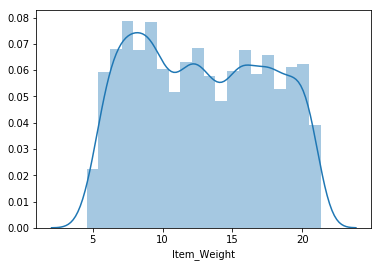

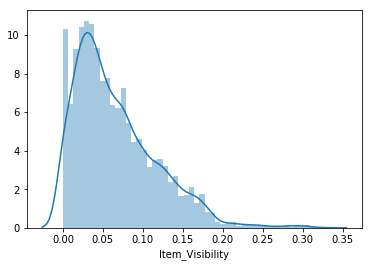

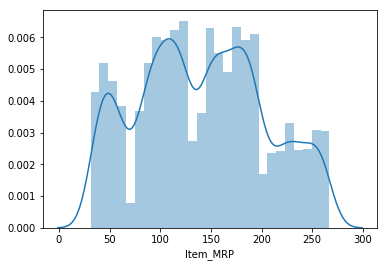

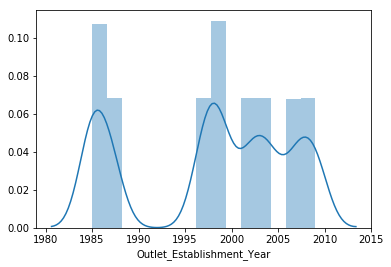

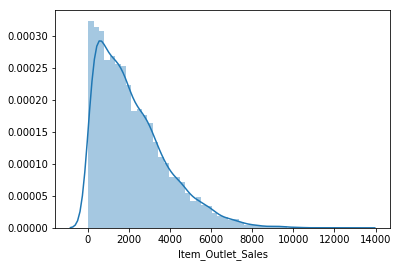

In [173]:
for i in train.describe().columns:
    sns.distplot(train[i].dropna())
    plt.show()
    

Most of the item weight are between 5 and 20.

Most of the item visibility is less and it is right skewed as can be seen from distribution

Somewhere around 1990, no establishment was there and in 2009, the last establishment has happened

Most of the outlet sales are under 7000 and it is right skewed as can be seen from distribution

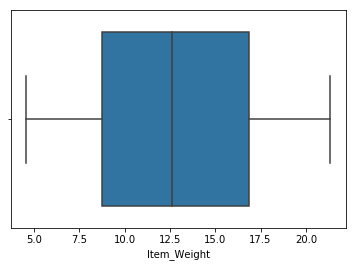

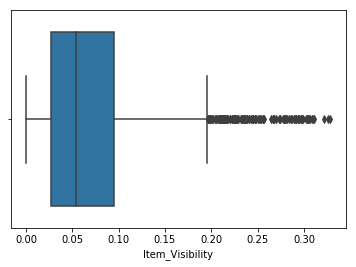

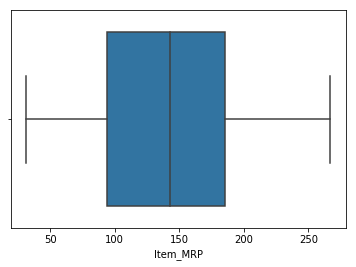

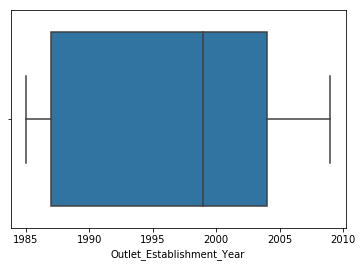

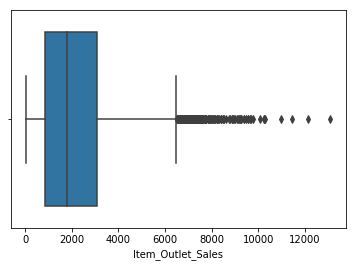

In [174]:
for i in train.describe().columns:
    sns.boxplot(train[i].dropna())
    plt.show()
    

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

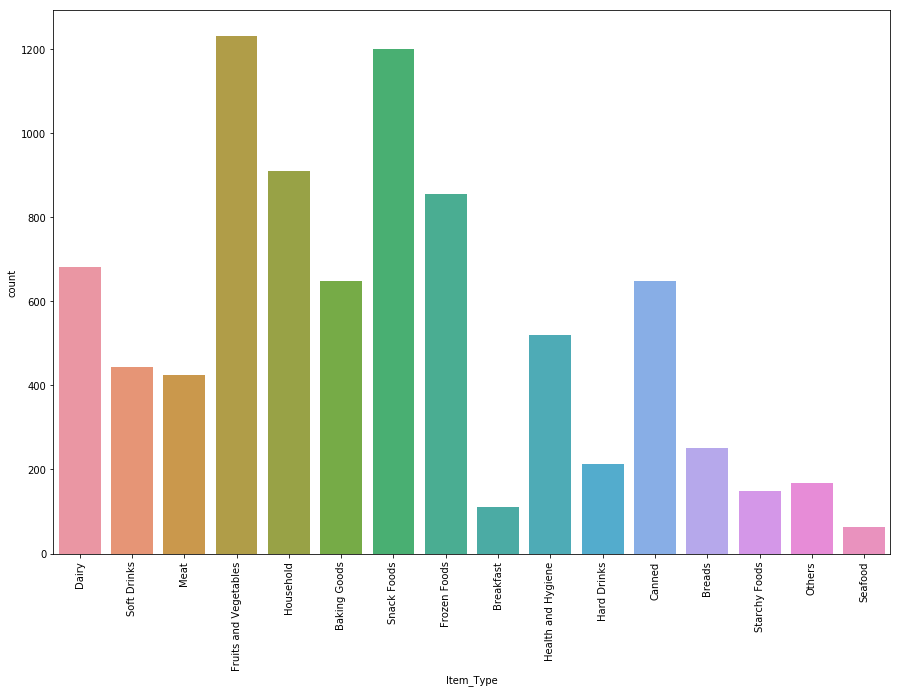

In [175]:
plt.figure(figsize=(15,10))
sns.countplot(train['Item_Type'])
plt.xticks(rotation=90)

we can see that the Item type 'Fruits and vegetables' forms the highest of about 1200+, followed by "snack Food'.

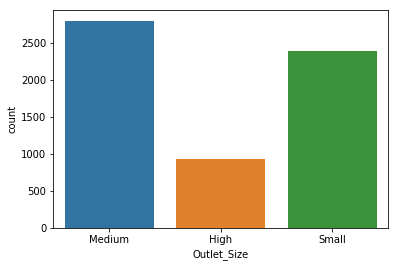

In [176]:
sns.countplot(train['Outlet_Size'])

'Medium' Outlet size forms the highest outlet size of about 2800.

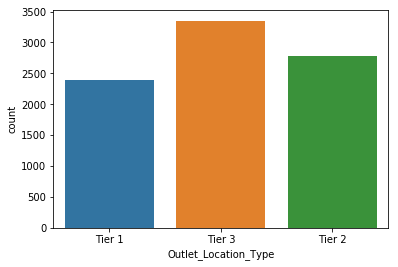

In [178]:
sns.countplot(train['Outlet_Location_Type'])

'Tier 3' forms the highest count in outlet Location Type  of about 3300.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

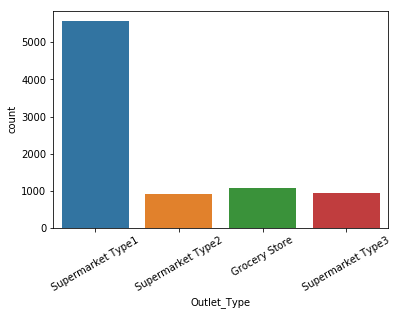

In [179]:
sns.countplot(train['Outlet_Type'])
plt.xticks(rotation=30)

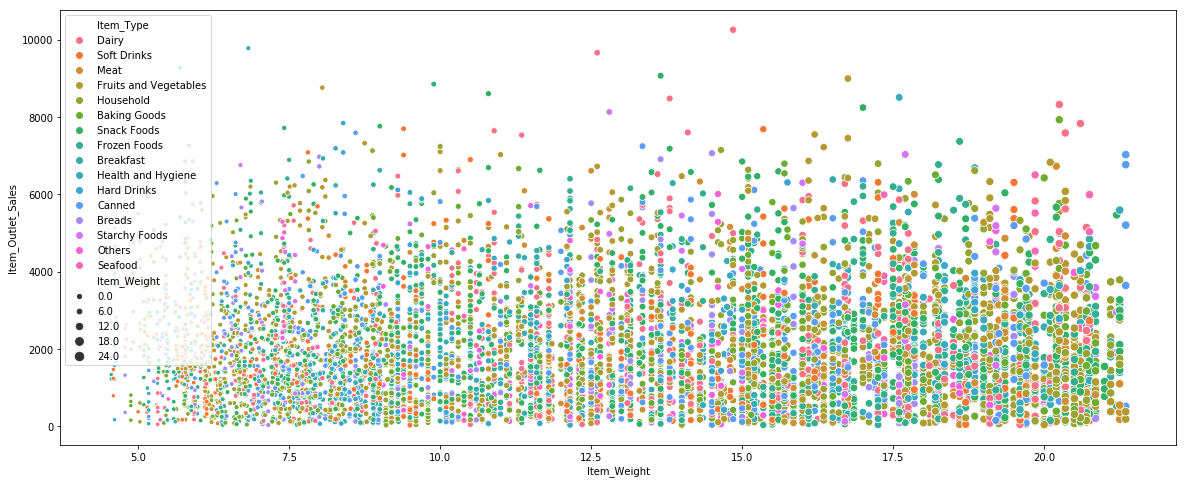

In [180]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales' , hue='Item_Type',size='Item_Weight',data=train)

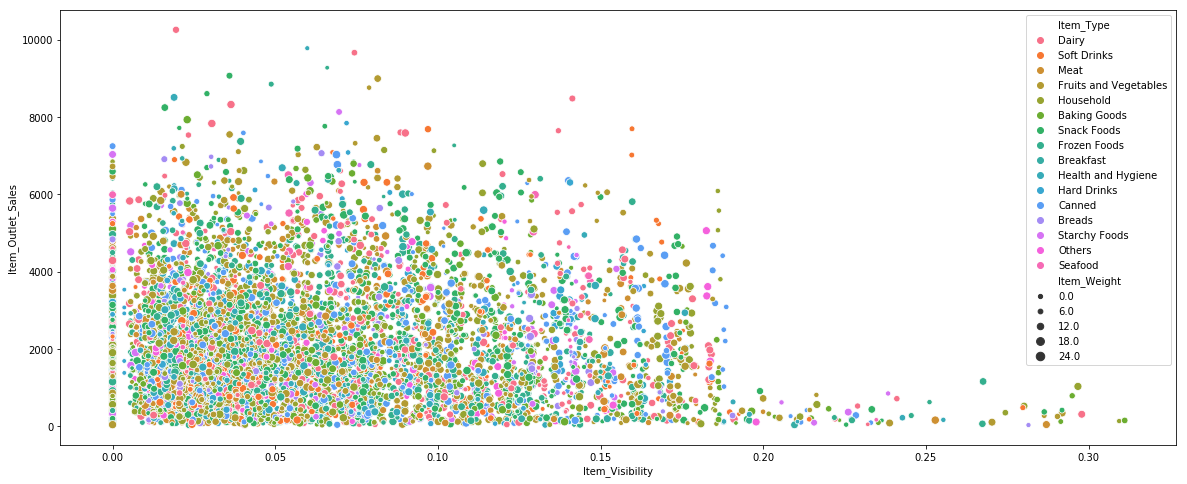

In [181]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales' , hue='Item_Type',size='Item_Weight',data=train)

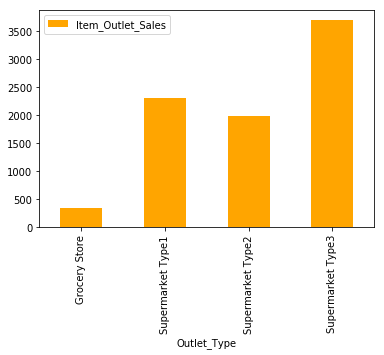

In [182]:
outlet_type_pivot=\
train.pivot_table(index='Outlet_Type',values='Item_Outlet_Sales')
outlet_type_pivot.plot(kind='bar', color='orange')
plt.show()

We can clearly see that in 'Supermarket Type3' the 'item outlet sales' is maximum and in 'Grocery Store' it is least.

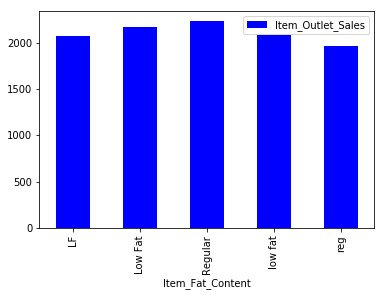

In [183]:
item_fat_pivot=\
train.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales')
item_fat_pivot.plot(kind='bar', color='blue')
plt.show()

In [184]:
df.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [185]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [186]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [187]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

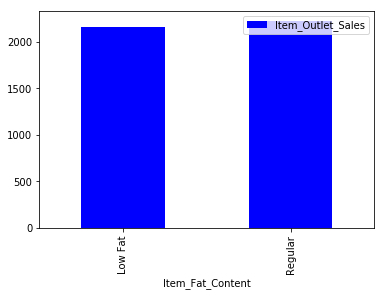

In [188]:
item_fat_pivot=\
train.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales')
item_fat_pivot.plot(kind='bar', color='blue')
plt.show()

In [189]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


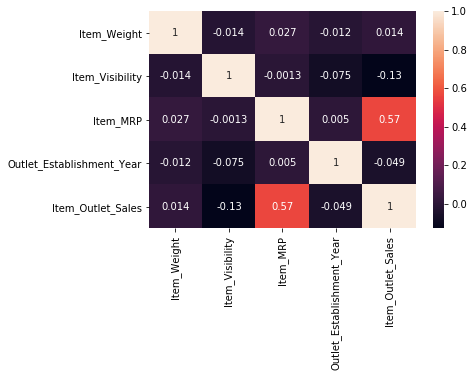

In [190]:
sns.heatmap(train.corr(),annot=True)

In [ ]:
# filling 'Item_Weight' null values with mean value of Item_Weight.

In [191]:
df['Item_Weight'].fillna(value=df['Item_Weight'].mean(),inplace=True)

In [192]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [ ]:
# filling 'Outlet_Size' null values with mode.

In [193]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [194]:
df.isnull().sum()

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                     0
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                     0
Outlet_Type                     0
source                          0
dtype: int64

In [195]:
df.Item_Visibility.nunique()

13006

In [196]:
df.Item_Visibility.value_counts().head(5)

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
Name: Item_Visibility, dtype: int64

In [197]:
df.Item_Visibility.mean()

0.06595278007399345

In [ ]:
# replacing 'Item_Visibility' value of '0' with mean value of Item_Visibility.

In [198]:
df['Item_Visibility']=df['Item_Visibility'].replace({0:df.Item_Visibility.mean()})

In [199]:
df.Item_Visibility.value_counts().head(5)

0.065953    879
0.076841      3
0.077290      3
0.077169      3
0.076792      3
Name: Item_Visibility, dtype: int64

In [200]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [ ]:
#subtracted with 2009, so as to know the age of the Outlet

In [201]:
df['Outlet_Establishment_Year']=2009-df['Outlet_Establishment_Year']

In [202]:
df['Outlet_Establishment_Year'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Establishment_Year, dtype: float64

In [203]:
df['Item_Identifier'].nunique()

1559

In [ ]:
#slicing the first 2 character of 'Item_Identifier' and storing it in a new column 'new_Item'

In [204]:
df['new_Item']=df['Item_Identifier'].apply(lambda x:x[0:2])

In [205]:
df['new_Item'].value_counts()

FD    10201
NC     2686
DR     1317
Name: new_Item, dtype: int64

As we can see the first character indicates nothing but Food, Non-Consumable, Drinks

In [206]:
df['new_Item']=df['new_Item'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [207]:
df['new_Item'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: new_Item, dtype: int64

In [208]:
df.loc[df['new_Item']=='Non-Consumable' , 'Item_Fat_Content']="Non-Edible"

If a item is Non-Consumable and with Fat Content in it then it is assumed to be Non-edible

In [210]:
df.Item_Fat_Content.value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [211]:
df.head(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,new_Item
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,10,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,0,OUT018,Tier 3,Medium,Supermarket Type2,train,Drinks
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,10,OUT049,Tier 1,Medium,Supermarket Type1,train,Food
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,11,OUT010,Tier 3,Medium,Grocery Store,train,Food
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.065953,8.93,22,OUT013,Tier 3,High,Supermarket Type1,train,Non-Consumable


In [212]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()

In [213]:
df['outlet']=label.fit_transform(df['Outlet_Identifier'])

In [214]:
cat_var=['Item_Fat_Content','outlet','Outlet_Location_Type','new_Item','Outlet_Size','Outlet_Type']
for i in cat_var:
    df[i]=label.fit_transform(df[i])

In [215]:
df.head(5)

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,new_Item,outlet
0,0,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,10,OUT049,0,1,1,train,1,9
1,2,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,0,OUT018,2,1,2,train,0,3
2,0,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,10,OUT049,0,1,1,train,1,9
3,2,FDX07,182.0950,732.3800,Fruits and Vegetables,0.065953,19.20,11,OUT010,2,1,0,train,1,0
4,1,NCD19,53.8614,994.7052,Household,0.065953,8.93,22,OUT013,2,0,1,train,2,1


In [216]:
df=pd.get_dummies(df, columns=cat_var)

In [217]:
df.shape

(14204, 35)

In [218]:
df.drop(['Item_Type'],axis=1,inplace=True)

In [219]:
df.head(5)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_Fat_Content_0,Item_Fat_Content_1,...,new_Item_0,new_Item_1,new_Item_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,249.8092,3735.1380,0.016047,9.30,10,OUT049,train,1,0,...,0,1,0,0,1,0,0,1,0,0
1,DRC01,48.2692,443.4228,0.019278,5.92,0,OUT018,train,0,0,...,1,0,0,0,1,0,0,0,1,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,10,OUT049,train,1,0,...,0,1,0,0,1,0,0,1,0,0
3,FDX07,182.0950,732.3800,0.065953,19.20,11,OUT010,train,0,0,...,0,1,0,0,1,0,1,0,0,0
4,NCD19,53.8614,994.7052,0.065953,8.93,22,OUT013,train,0,1,...,0,0,1,1,0,0,0,1,0,0


In [ ]:
#separating training and test data on the basis of 'source' columns

In [220]:
train=df.loc[df['source']=='train']
test=df.loc[df['source']=='test']

In [221]:
test.head(5)

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,source,Item_Fat_Content_0,Item_Fat_Content_1,...,new_Item_0,new_Item_1,new_Item_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
8523,FDW58,107.8622,NaN,0.007565,20.750000,10,OUT049,test,1,0,...,0,1,0,0,1,0,0,1,0,0
8524,FDW14,87.3198,NaN,0.038428,8.300000,2,OUT017,test,0,0,...,0,1,0,0,1,0,0,1,0,0
8525,NCN55,241.7538,NaN,0.099575,14.600000,11,OUT010,test,0,1,...,0,0,1,0,1,0,1,0,0,0
8526,FDQ58,155.0340,NaN,0.015388,7.315000,2,OUT017,test,1,0,...,0,1,0,0,1,0,0,1,0,0
8527,FDY38,234.2300,NaN,0.118599,12.792854,24,OUT027,test,0,0,...,0,1,0,0,1,0,0,0,0,1


In [222]:
train.drop(['source'],axis=1,inplace=True)
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

D:\all\sw\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [223]:
test.head()

,Item_Identifier,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,outlet_0,...,new_Item_0,new_Item_1,new_Item_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
8523,FDW58,107.8622,0.007565,20.750000,10,OUT049,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8524,FDW14,87.3198,0.038428,8.300000,2,OUT017,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
8525,NCN55,241.7538,0.099575,14.600000,11,OUT010,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
8526,FDQ58,155.0340,0.015388,7.315000,2,OUT017,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
8527,FDY38,234.2300,0.118599,12.792854,24,OUT027,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
# importing train_test_split and Performing train test split

In [224]:
from sklearn.model_selection import train_test_split
x=train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y=train.Item_Outlet_Sales

In [225]:
x.shape

(8523, 30)

In [226]:
y.shape

(8523,)

In [227]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)

In [ ]:
# LinearRegression

In [228]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)
lm.fit(x_train, y_train)
print(lm.fit(x_train, y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


In [229]:
lm_pred=lm.predict(x_test)

In [230]:
lm_pred

array([2969.23906729, 1515.61668502, 2585.81461045, ..., 1894.43585807,
       2000.56730236, 1714.03324167])

In [231]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, lm_pred))
print('MSE:', metrics.mean_squared_error(y_test, lm_pred))

MAE: 836.423657975852
MSE: 1290037.669363874


In [232]:
lr_accuracy=round(lm.score(x_train,y_train)*100)

In [233]:
lr_accuracy

57.0

With Linear Regressor we are getting an accuracy of 57%.

In [253]:
X_test_2 = test.drop(['Outlet_Identifier','Item_Identifier'], axis=1)


In [255]:
lm_pred2=lm.predict(X_test_2)


In [257]:
submission = pd.DataFrame({
'Item_Identifier':test['Item_Identifier'],
'Outlet_Identifier':test['Outlet_Identifier'],
'Item_Outlet_Sales': lm_pred2
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [258]:
submission.to_csv('submission1.csv',index=False)

In [ ]:
# Decision Tree

In [234]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(max_depth=15,min_samples_leaf=100)
tree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=100,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [235]:
tree_pred=tree.predict(x_test)

In [236]:
tree_accuracy=round(tree.score(x_train,y_train)*100)

In [237]:
tree_accuracy

61.0

With Decision Tree Regressor we are getting an accuracy of 61%.

In [268]:
tree_pred2=tree.predict(X_test_2)

In [269]:
submission = pd.DataFrame({
'Item_Identifier':test['Item_Identifier'],
'Outlet_Identifier':test['Outlet_Identifier'],
'Item_Outlet_Sales': tree_pred2
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [270]:
submission.to_csv('submission2.csv',index=False)

In [ ]:
#Random Forest

In [238]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100, n_jobs=4)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=100, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=4,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [239]:
rf_pred=rf.predict(x_test)

In [240]:
rf_accuracy=round(rf.score(x_train,y_train)*100)

In [241]:
rf_accuracy

61.0

With Random Forest Regressorr we are getting an accuracy of 61%.

In [262]:
rf_pred2=rf.predict(X_test_2)

In [263]:
submission = pd.DataFrame({
'Item_Identifier':test['Item_Identifier'],
'Outlet_Identifier':test['Outlet_Identifier'],
'Item_Outlet_Sales': rf_pred2
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [264]:
submission.to_csv('submission3.csv',index=False)

In [ ]:
#XGBOOST

In [242]:
import sys
!{sys.executable} -m pip install xgboost

In [243]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=800, learning_rate=0.05)
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=800, n_jobs=12, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [244]:
model_pred=model.predict(x_test)

In [245]:
model_accuracy=round(model.score(x_train,y_train)*100)

In [246]:
model_accuracy

87.0

With Random Forest Regressorr we are getting an accuracy of 87%

In [251]:
X_test1 = test.drop(['Outlet_Identifier','Item_Identifier'], axis=1)

In [265]:
model_pred=model.predict(X_test1)

In [266]:
submission = pd.DataFrame({
'Item_Identifier':test['Item_Identifier'],
'Outlet_Identifier':test['Outlet_Identifier'],
'Item_Outlet_Sales': lm_pred2
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [267]:
submission.to_csv('submission4.csv',index=False)